### Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
titantic_data = pd.read_csv('train.csv')

In [3]:
holdout_set = pd.read_csv('holdout_test.csv')

In [4]:
titantic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titantic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titantic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titantic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cleaning the Data

In [8]:
#Dropping the Unnecessary Columns

dropping_cols = ['PassengerId','Name','Ticket','Cabin']
final_cols = list(set(titantic_data.columns) - set(dropping_cols))

In [9]:
train_dat = titantic_data[final_cols]

In [10]:
holdout_set = holdout_set[final_cols]

In [11]:
train_dat.head()

,Fare,Sex,Age,Parch,SibSp,Pclass,Embarked,Survived
0,7.2500,male,22.0,0,1,3,S,0
1,71.2833,female,38.0,0,1,1,C,1
2,7.9250,female,26.0,0,0,3,S,1
3,53.1000,female,35.0,0,1,1,S,1
4,8.0500,male,35.0,0,0,3,S,0


In [12]:
holdout_set.head()

,Fare,Sex,Age,Parch,SibSp,Pclass,Embarked,Survived
0,7.8292,male,34.5,0,0,3,Q,NaN
1,7.0000,female,47.0,0,1,3,S,NaN
2,9.6875,male,62.0,0,0,2,Q,NaN
3,8.6625,male,27.0,0,0,3,S,NaN
4,12.2875,female,22.0,1,1,3,S,NaN


In [13]:
train_dat['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
train_dat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#Filling Missing Values of Embarked
train_dat['Embarked'] = train_dat['Embarked'].fillna('S')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#Filling Missing Values of Embarked
holdout_set['Embarked'] = holdout_set['Embarked'].fillna('S')

In [17]:
holdout_set['Fare'] = holdout_set['Fare'].fillna(holdout_set['Fare'].mean())

In [18]:
train_dat['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
train_dat['is_male'] = train_dat['Sex'].apply(lambda x: 1 if x=='male' else 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
holdout_set['is_male'] = holdout_set['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [21]:
train_dat['family_members'] = train_dat['SibSp'] + train_dat['Parch'] + 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
holdout_set['family_members'] = holdout_set['SibSp'] + holdout_set['Parch'] + 1

In [23]:
train_dat['is_alone'] = train_dat['family_members'].apply(lambda x: 1 if x==1 else 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
holdout_set['is_alone'] = holdout_set['family_members'].apply(lambda x: 1 if x==1 else 0)

In [25]:
train_dat.head()

,Fare,Sex,Age,Parch,SibSp,Pclass,Embarked,Survived,is_male,family_members,is_alone
0,7.2500,male,22.0,0,1,3,S,0,1,2,0
1,71.2833,female,38.0,0,1,1,C,1,0,2,0
2,7.9250,female,26.0,0,0,3,S,1,0,1,1
3,53.1000,female,35.0,0,1,1,S,1,0,2,0
4,8.0500,male,35.0,0,0,3,S,0,1,1,1


In [26]:
drop_cols = ['SibSp','Parch','Sex']
train_dat = train_dat.drop(drop_cols, axis=1)

In [27]:
drop_cols = ['SibSp','Parch','Sex']
holdout_set = holdout_set.drop(drop_cols, axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_dat['Embarked'].unique())
values = le.transform(train_dat['Embarked'].values)
train_dat['Embarked_Port'] = values

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(holdout_set['Embarked'].unique())
values = le.transform(holdout_set['Embarked'].values)
holdout_set['Embarked_Port'] = values

In [30]:
train_dat = train_dat.drop('Embarked',axis=1)

In [31]:
holdout_set = holdout_set.drop('Embarked',axis=1)

In [32]:
train_dat['Age'] = train_dat['Age'].fillna(method='ffill')

In [33]:
holdout_set['Age'] = holdout_set['Age'].fillna(method='ffill')

In [34]:
train_dat['AgeBins'] = pd.cut(train_dat['Age'],5)

In [35]:
train_dat['AgeBins'].value_counts()

(16.336, 32.252]    422
(32.252, 48.168]    240
(0.34, 16.336]      129
(48.168, 64.084]     87
(64.084, 80.0]       13
Name: AgeBins, dtype: int64

In [36]:
le = LabelEncoder()
le.fit(train_dat['AgeBins'].unique())
values = le.transform(train_dat['AgeBins'].values)
train_dat['AgeBins'] = values
train_dat['AgeBins'].value_counts()

1    422
2    240
0    129
3     87
4     13
Name: AgeBins, dtype: int64

In [37]:
train_dat['Age*Pclass'] = train_dat['AgeBins']*train_dat['Pclass']

In [38]:
holdout_set['AgeBins'] = pd.cut(holdout_set['Age'],5)

In [39]:
holdout_set['AgeBins'].value_counts()

(15.336, 30.502]    215
(30.502, 45.668]    100
(45.668, 60.834]     54
(0.0942, 15.336]     39
(60.834, 76.0]       10
Name: AgeBins, dtype: int64

In [40]:
le = LabelEncoder()
le.fit(holdout_set['AgeBins'].unique())
values = le.transform(holdout_set['AgeBins'].values)
holdout_set['AgeBins'] = values
holdout_set['AgeBins'].value_counts()

1    215
2    100
3     54
0     39
4     10
Name: AgeBins, dtype: int64

In [41]:
holdout_set['Age*Pclass'] = train_dat['AgeBins']*holdout_set['Pclass']

In [42]:
holdout_set['Age*Pclass'] = holdout_set['Age*Pclass'].astype('int')

In [43]:
train_dat['Fare Bins'] = pd.qcut(train_dat['Fare'],4)

In [44]:
holdout_set['Fare Bins'] = pd.qcut(holdout_set['Fare'],4)

In [45]:
le = LabelEncoder()
le.fit(train_dat['Fare Bins'].unique())
values = le.transform(train_dat['Fare Bins'].values)
train_dat['Fare Bins'] = values
train_dat['Fare Bins'].value_counts()

1    224
0    223
3    222
2    222
Name: Fare Bins, dtype: int64

In [46]:
le = LabelEncoder()
le.fit(holdout_set['Fare Bins'].unique())
values = le.transform(holdout_set['Fare Bins'].values)
holdout_set['Fare Bins'] = values
holdout_set['Fare Bins'].value_counts()

0    114
2    105
3    103
1     96
Name: Fare Bins, dtype: int64

In [47]:
train_dat.drop(['Fare'],axis=1,inplace=True)

In [48]:
holdout_set.drop(['Fare'],axis=1,inplace=True)

In [49]:
train_dat.drop(['Age'],axis=1,inplace=True)

In [50]:
holdout_set.drop(['Age'],axis=1,inplace=True)

### Final Train and Holdout Sets

In [53]:
train_dat.head()

,Pclass,Survived,is_male,family_members,is_alone,Embarked_Port,AgeBins,Age*Pclass,Fare Bins
0,3,0,1,2,0,2,1,3,0
1,1,1,0,2,0,0,2,2,3
2,3,1,0,1,1,2,1,3,1
3,1,1,0,2,0,2,2,2,3
4,3,0,1,1,1,2,2,6,1


In [54]:
holdout_set.head()

,Pclass,Survived,is_male,family_members,is_alone,Embarked_Port,AgeBins,Age*Pclass,Fare Bins
0,3,NaN,1,1,1,1,2,3,0
1,3,NaN,0,2,0,2,3,6,0
2,2,NaN,1,1,1,1,4,2,1
3,3,NaN,1,1,1,2,1,6,1
4,3,NaN,0,3,0,2,1,6,1


In [55]:
holdout_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass            418 non-null int64
Survived          0 non-null float64
is_male           418 non-null int64
family_members    418 non-null int64
is_alone          418 non-null int64
Embarked_Port     418 non-null int64
AgeBins           418 non-null int64
Age*Pclass        418 non-null int64
Fare Bins         418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


### Exploratory Data Analysis

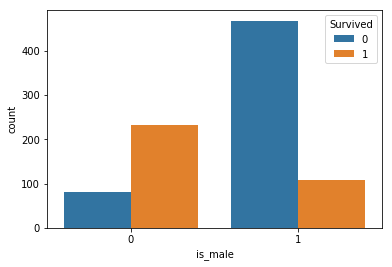

In [56]:
sns.countplot(x="is_male",hue='Survived',data=train_dat)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


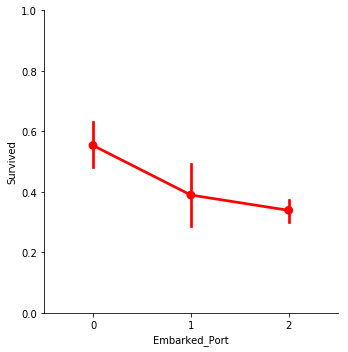

In [57]:
h = sns.PairGrid(data=train_dat, x_vars=['Embarked_Port'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


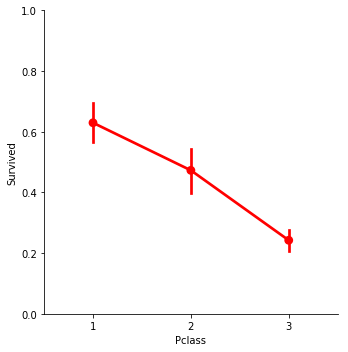

In [58]:
h = sns.PairGrid(data=train_dat, x_vars=['Pclass'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


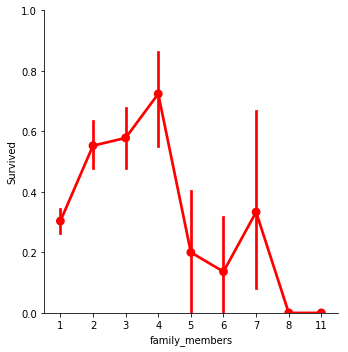

In [59]:
h = sns.PairGrid(data=train_dat, x_vars=['family_members'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


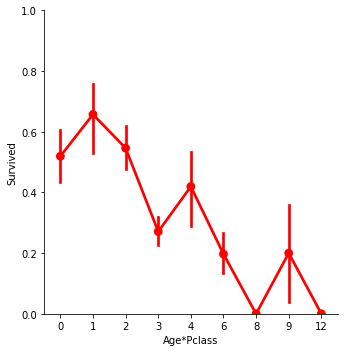

In [60]:
h = sns.PairGrid(data=train_dat, x_vars=['Age*Pclass'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


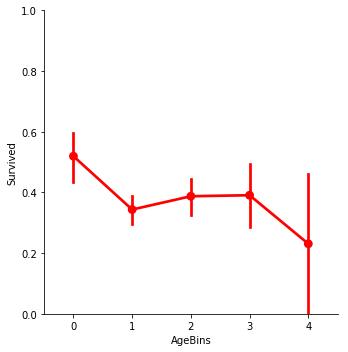

In [61]:
h = sns.PairGrid(data=train_dat, x_vars=['AgeBins'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


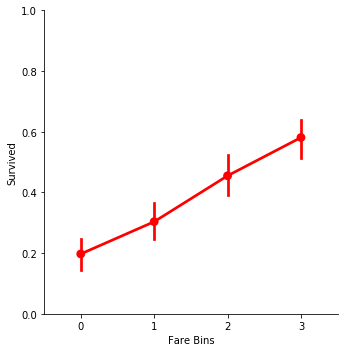

In [62]:
h = sns.PairGrid(data=train_dat, x_vars=['Fare Bins'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

### Train and Test Split

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [64]:
set(train_dat.columns) - set(['Survived'])

{'Age*Pclass',
 'AgeBins',
 'Embarked_Port',
 'Fare Bins',
 'Pclass',
 'family_members',
 'is_alone',
 'is_male'}

In [65]:
X = train_dat[list(set(train_dat.columns) - set(['Survived']))]
y = train_dat['Survived']

In [66]:
seed = 0
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

(712, 8)
(179, 8)
(712,)
(179,)
     Fare Bins  Age*Pclass  is_alone  family_members  Pclass  AgeBins  \
140          2           3         0               3       3        1   
439          1           2         1               1       2        1   
817          3           2         0               3       2        1   
378          0           3         1               1       3        1   
491          0           3         1               1       3        1   

     Embarked_Port  is_male  
140              0        0  
439              2        1  
817              0        1  
378              0        1  
491              2        1  
     Fare Bins  Age*Pclass  is_alone  family_members  Pclass  AgeBins  \
495          2           3         1               1       3        1   
648          0           9         1               1       3        3   
278          2           0         0               6       3        0   
31           3           2         0               2     

### Testing Different Classifiers

In [67]:
def fit_classifier(model_name):
    
    model = model_name()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, predictions))
    print("F1 Score:",metrics.f1_score(y_test, predictions))

In [68]:
models_to_test = [LogisticRegression,SVC,LinearSVC,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier]
for i in models_to_test:
    print(i)
    fit_classifier(i)
    print('\n')

<class 'sklearn.linear_model.logistic.LogisticRegression'>
Accuracy: 0.7932960893854749
F1 Score: 0.7131782945736433


<class 'sklearn.svm.classes.SVC'>
Accuracy: 0.8044692737430168
F1 Score: 0.7286821705426356


<class 'sklearn.svm.classes.LinearSVC'>
Accuracy: 0.776536312849162
F1 Score: 0.7058823529411765


<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
Accuracy: 0.7821229050279329
F1 Score: 0.7022900763358778


<class 'sklearn.tree.tree.DecisionTreeClassifier'>
Accuracy: 0.8156424581005587
F1 Score: 0.7401574803149606


<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Accuracy: 0.8212290502793296
F1 Score: 0.7647058823529411


<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
Accuracy:

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.8435754189944135
F1 Score: 0.7704918032786885




### Emsemble Modeling

In [74]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=seed)
rf = RandomForestClassifier(n_estimators=100,random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)
# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Random Forest', rf),
('Gradient Boosting', gb)]

In [75]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(X_train, y_train)
# Predict the labels of the test set
    y_predictions = clf.predict(X_test)
# Evaluate the accuracy of clf on the test set
    print('{:s} Accuracy Score: {:.3f}'.format(clf_name,
    metrics.accuracy_score(y_test, y_predictions)))
    print('{:s} F1 Score: {:.3f}'.format(clf_name,
    metrics.f1_score(y_test, y_predictions)))

Random Forest Accuracy Score: 0.816
Random Forest F1 Score: 0.752
Gradient Boosting Accuracy Score: 0.844
Gradient Boosting F1 Score: 0.770


In [76]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers,voting='soft')
# Fit 'vc' to the traing set
vc.fit(X_train, y_train)
# Predict test set labels
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'

accuracy = metrics.accuracy_score(y_test, y_pred)
f1score = metrics.f1_score(y_test, y_pred)
print('Voting Classifier: Accuracy - {:.3f}'.format(accuracy))
print('Voting Classifier: F1 Score - {:.3f}'.format(f1score))

Voting Classifier: Accuracy - 0.844
Voting Classifier: F1 Score - 0.778


### Write Up To Explain Model Selection Process

The first step was to use a train and test split with 20% of the values for the test and 80% of the values for train. To get an idea of how different models perform, I tested the following classifiers on the same train and test split data with the seed of random_state = 0. I tested - LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, and GradientBoostingClassifier. Out of these models, we can see that the RandomForest Classifier and the GradientBoosting Classfier led to the highest accuracy and F1-scores. 

Gradient Boosting build trees one at a time, where each new tree helps to correct errors made by previously trained tree - this makes sense to give a higher accuracy because it learns from each iteration. One weakness of Gradient Boosting however is that they are more prone to overfitting. 

RandomForest trains each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data. 

Once I used an ensemble model with both the models, it was clear that with soft voting most of the predictions were coming from the Gradient Boosting - so I decided to select that as my final model.

**Final Model Selected will be Gradient Boosting.**

In [84]:
final_model = GradientBoostingClassifier(random_state=seed)
final_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Cross Validation Scoring

In [85]:
from sklearn.model_selection import cross_val_score

CV_scores = cross_val_score(final_model, X_train, y_train, cv=10, n_jobs=-1) 

print(CV_scores)

print('mean CV score:', round(CV_scores.mean(),2))

[0.80555556 0.79166667 0.875      0.91549296 0.8028169  0.81690141
 0.74647887 0.81690141 0.83098592 0.8       ]
mean CV score: 0.82


In [86]:
imp_features = pd.DataFrame(X_train.columns,gb.feature_importances_).reset_index().sort_values(by='index',ascending=False)
imp_features.columns = ['Feature Importance','Feature Name']
imp_features

,Feature Importance,Feature Name
7,0.573770,is_male
4,0.145068,Pclass
3,0.094695,family_members
1,0.071814,Age*Pclass
0,0.054161,Fare Bins
5,0.028114,AgeBins
6,0.023015,Embarked_Port
2,0.009362,is_alone


### Applying Model on Holdout Set

In [87]:
X_hold_out = holdout_set[list(set(holdout_set.columns) - set(['Survived']))]
X_hold_out.head()

,Fare Bins,Age*Pclass,is_alone,family_members,Pclass,AgeBins,Embarked_Port,is_male
0,0,3,1,1,3,2,1,1
1,0,6,0,2,3,3,2,0
2,1,2,1,1,2,4,1,1
3,1,6,1,1,3,1,2,1
4,1,6,0,3,3,1,2,0


In [88]:
hold_out_pred = final_model.predict(X_hold_out)

In [89]:
hold_out_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [91]:
holdout_set_final = pd.read_csv('holdout_test.csv')

In [92]:
holdout_set_final['Survived'] = hold_out_pred

In [96]:
holdout_set_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Survived       418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [109]:
titantic_predictions = holdout_set_final[['PassengerId','Survived']]

In [114]:
titantic_predictions.to_csv('titanic_results_chiraagkala.csv',index=False)